<a href="https://colab.research.google.com/github/spiyer99/simpsonification/blob/master/simpsonise_stylegan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q ipython-autotime
%load_ext autotime

time: 156 µs (started: 2021-01-22 20:07:30 +00:00)


# Global Vars

In [ ]:
from pathlib import Path
%cd /content
!pwd
SIMPSONS_DATASET = Path.cwd()/'simpsons_dataset'
SIMPSONS_DATASET.mkdir(parents = True, exist_ok = True)
SIMPSONS_DATASET

/content
/content


PosixPath('/content/simpsons_dataset')

time: 111 ms (started: 2021-01-22 20:07:32 +00:00)


# Download Dataset

In [ ]:
def create_training_dataset_simpson_faces(download_dir):

  try: shutil.rmtree(download_dir)
  except: pass
  Path(download_dir).mkdir(parents = True, exist_ok = True)
  %cd $download_dir

  # download dataset and unzip
  !kaggle datasets download kostastokis/simpsons-faces --force
  # !kaggle datasets download alexattia/the-simpsons-characters-dataset --force
  !unzip \*.zip
  !rm *.zip
  !cp -a $download_dir/cropped/. $download_dir

  # remove unnecessary folders
  !rm -Rf $download_dir/cropped
  !rm -Rf $download_dir/simplified

  # go back to orig directory
  %cd ..

create_training_dataset_simpson_faces(SIMPSONS_DATASET)

# Resize images

In [ ]:
!pip install fastcore

     |████████████████████████████████| 61kB 5.7MB/s 
time: 3.22 s (started: 2021-01-22 20:07:46 +00:00)


In [ ]:
min_h = 4
min_w = 4
n = 6
SIZE = (min_h * 2**n, min_w * 2**n)
SIZE

(256, 256)

time: 5.17 ms (started: 2021-01-22 20:07:50 +00:00)


In [ ]:
from fastcore.parallel import parallel
import glob
import PIL
import os

# ensure imgs are the same size
def resize_one(fn, size):
  img = PIL.Image.open(fn)
  img = img.resize(size, resample=PIL.Image.BILINEAR).convert('RGB')
  os.remove(fn)
  img.save(fn, quality=100)

simpsons_imgs = glob.glob(str(SIMPSONS_DATASET/'*.*g'))
parallel(resize_one, simpsons_imgs, size = SIZE, n_workers = 4)

(#9877) [None,None,None,None,None,None,None,None,None,None...]

time: 1min 1s (started: 2021-01-22 20:07:50 +00:00)


# See training data

9877 imgs in SIMPSONS_DATASET directory
(256, 256)


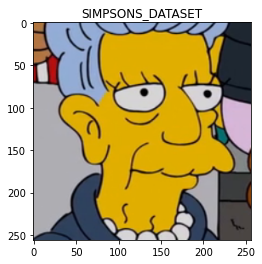

time: 200 ms (started: 2021-01-22 20:08:51 +00:00)


In [ ]:
import PIL
import random
import glob
import matplotlib.pyplot as plt


def plot_random_from_image_path(path, title):
  
  all_imgs = glob.glob(str(path/'*.*g'))
  print(f'{len(all_imgs)} imgs in {title} directory')

  img_path = random.choice(all_imgs)
  img = PIL.Image.open(img_path)
  size = img.size

  print(size)
  plt.imshow(img)
  plt.title(title)
  plt.show()

  return size
  
size = plot_random_from_image_path(SIMPSONS_DATASET, 'SIMPSONS_DATASET')

# Keep only 100 photos (without blue haired people)
For some reason the blending works better on a model trained with smaller datasets

In [ ]:
import random
import PIL

all_imgs = glob.glob(str(SIMPSONS_DATASET/'*.*g'))
to_keep = random.sample(all_imgs, 200)
full_list = [PIL.Image.open(i) for i in to_keep]

time: 33.5 ms (started: 2021-01-22 20:29:53 +00:00)


In [ ]:
marge_img = [6189, 2703, 6439, 1064, 5203, 9776, 8843, 1025, 4024, 1057, 5001, 9752, 4980, 3839, 2280, 5180, \
             4771, 3387, 4771, 5774, 9700, 4352, 5864, 3387, 9700, 8580, 4348, 5315, 6347, 8557, 7229, 4393, \
             9566, 4848, 6664, 737, 9043, 3214, 922, 2175, 924, 9393, 9809, 6954, 3711, 2843, 8297, 9543, 2843,\
            8297, 5778, 2982, 1378, 510, 1502, 22, 1506, 8707, 5995, 967, 1985, 8019, 4009, 7295, 5873, \
             6569, 5719, 4959, 8218, 1655, 2839, 3791, 4844, 6411, 2787, 5425, 7538, 3730, 3167, 1033,\
             4861, 1575, 8528, 6607, 1632, 2194, 2931, 5652, 369, 1940, 2707, 6075, 1050, 1053, 6387, 558, 7665,\
             6394, 5400, 2072, 8995, 8194, 9205, 8588, 5685, 1110, 3446, 8018, 2071, 1096, 4937, 4036, 9598, 1577,\
             502, 3469, 772, 6559, 6708, 399, 5154, 8396, 8305, 6497, 1764, 6119, 4482, 1264, 2834, 6243, 7287,\
             4047, 1306, 2197, 5466, 5255, 763, 552, 7361, 605, 9826, 8491, 1254, 6067, 4015, 3476, 2086, 2989, 368] 
spiky_hair =  [243, 7454, 8448, 5620, 6138, 7285, 4817, 6917, 3076, 3562, 2538, 8190, 7157, 709, 7450, 2836, 4563,\
              6180, 6473, 7163, 1077, 3721, 1467, 9799, 2532, 1529, 626, 7481, 8380, 1635, 7621, 7384, 1513, 1669,\
              3717, 4189, 5288, 68, 8094, 650, 1049, 6004, 9660, 8279, 3936, 4990, 4774, 6573, 9398, 6629, 3988,\
              2567, 1943, 5051, 110, 7246, 1888, 4315, 2442, 3517, 69, 681, 344, 1528, 5097, 3221,8841, 1341, 7861,\
              7565, 5856, 1788, 6266, 8864, 5806, 8984, 8260, 752, 8273, 3996, 2060, 3178, 9871, 9765, 4319, 5675,\
              4237, 4604, 859, 7107, 4258,  847, 2794, 5707, 275, 8428, 1818, 2040, 3742, 3813, 6042, 9336, 5812,\
              7044, 358, 6692, 647, 9307, 9117, 3178, 9553, 3993, 2039, 3336, 1472, 2031, 905, 7391, 6374, 1874,\
              6356, 1385, 3695, 7870, 4595, 2295, 5687, 7079, 4399, 8072, 7555, 3491, 5352, 3909, 7045, 9150, 6219,\
               4146, 7731, 8835,3681, 9494, 8601, 6440, 721, 2925, 284, 4412, 5547, 6, 7122, 2566, 4976, 4977, 9763,\
               362, 93, 7126, 7191, 7728, 2749, 2636, 6525, 8705, 9415, 3470, 8064, 5895, 5646, 5768, 4936, 3949,\
               1425, 2265, 914, 4012, 4000, 2746, 3568, 5724, 3240, 3928, 3995, 4830, 3707, 6935, 937, 1461, 3139,\
               2270, 9093, 1622, 3044, 5629, 3546, 2498, 9374, 4186, 6188, 5889, 2416, 5887, 6205, 4863, 5112, 5763,\
               9113, 7121, 8947, 9145, 6112, 6805, 408, 5210, 2696, 1763, 1336, 5941, 9002, 5244, 3821, 3952, 8785,\
               1445, 2774, 4530, 9568, 3938, 3760, 6883, 7485, 5484, 6224, 4928, 2783] 

def number_match_file_path(number, file_path):
  return int(Path(file_path).stem) != int(number)
  
to_keep_without_marge = [i for i in to_keep if all([number_match_file_path(j,i) for j in marge_img + spiky_hair])]
len(to_keep_without_marge)

91

time: 413 ms (started: 2021-01-22 20:47:44 +00:00)


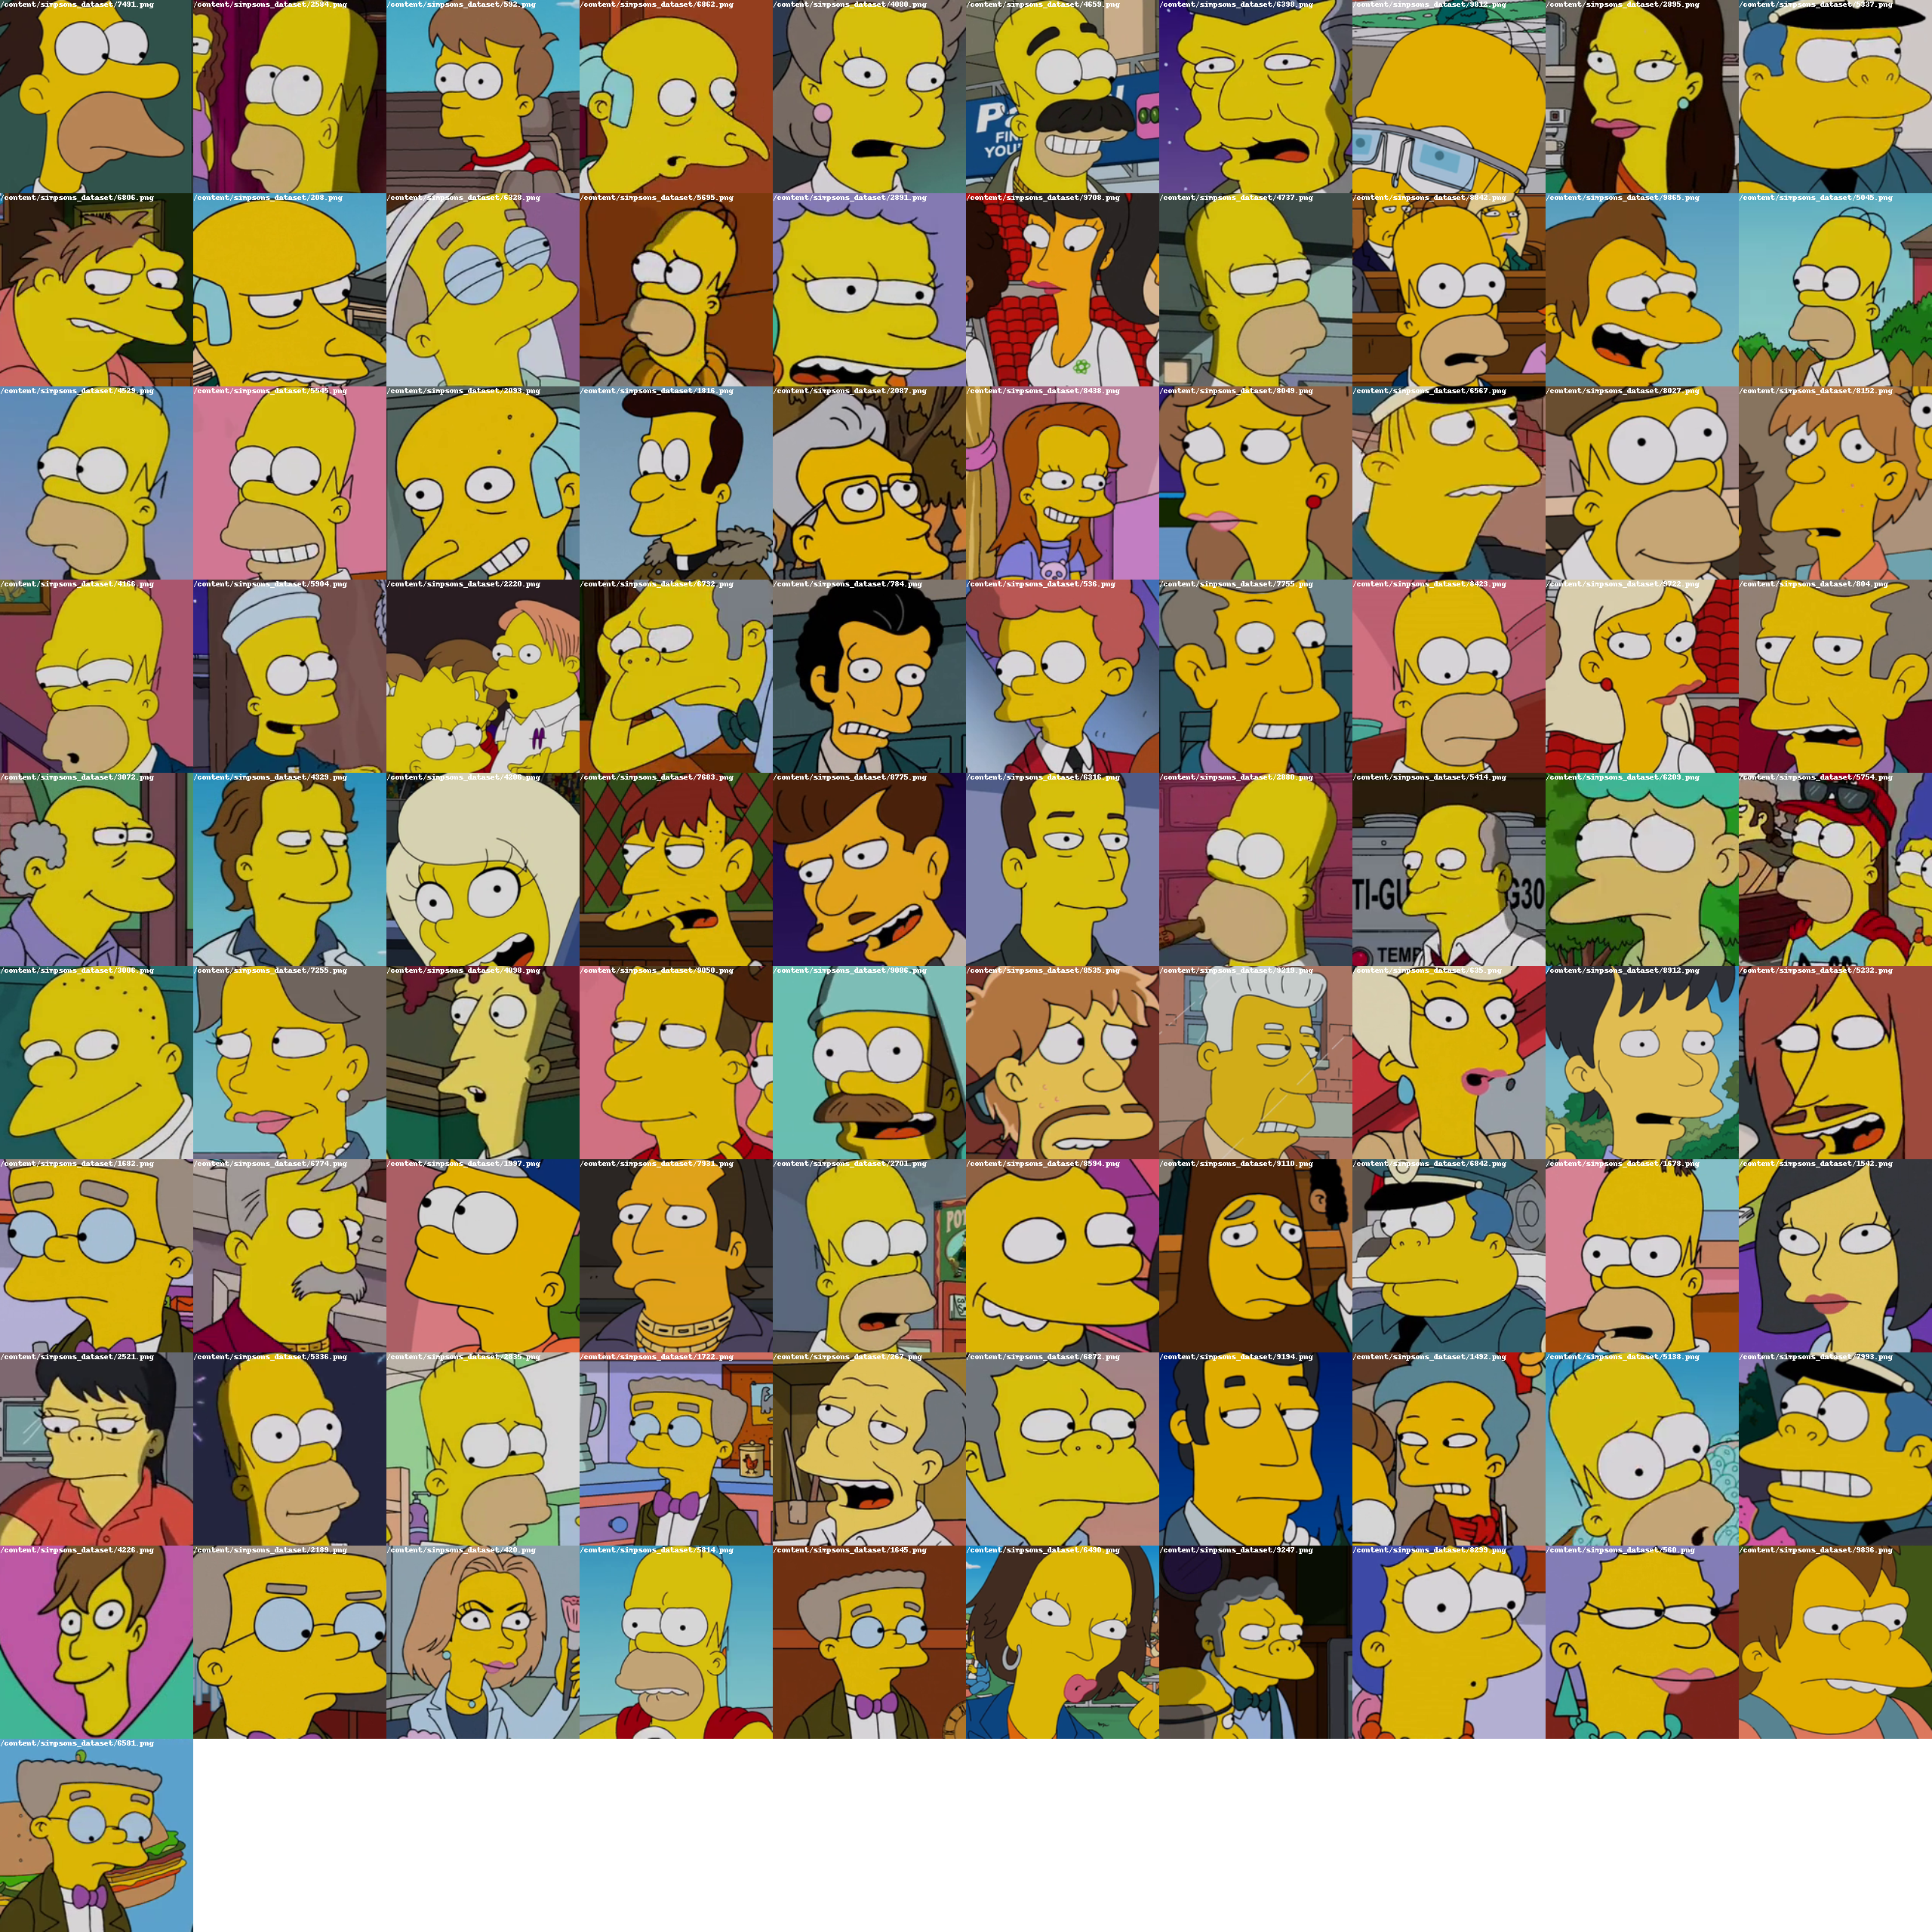

time: 2.05 s (started: 2021-01-22 20:47:47 +00:00)


In [ ]:
from math import ceil
from io import BytesIO
import IPython.display
import os
import numpy as np
from PIL import ImageFont
from PIL import ImageDraw 

def imshow_func(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
            'trying jpeg instead.').format(format)
      return imshow_func(a, format='jpeg')
    else:
      raise
  return disp

# taken from stylegan
def createImageGrid(filepaths, scale=0.25, rows=1):
  images = [PIL.Image.open(i) for i in filepaths]
  w,h = images[0].size
  w = int(w*scale)
  h = int(h*scale)
  height = rows*h
  cols = ceil(len(images) / rows)
  width = cols*w
  canvas = PIL.Image.new('RGBA', (width,height), 'white')
  for i,img in enumerate(images):
    img = img.resize((w,h), PIL.Image.ANTIALIAS)
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype("sans-serif.ttf", 16)
    draw.text((0, 0),filepaths[i],(255,255,255))
    canvas.paste(img, (w*(i % cols), h*(i // cols))) 
  return canvas

imshow_func(createImageGrid(to_keep_without_marge, rows = 10, scale = 1))

In [ ]:
# raise 'remove blue haired people manually'

RuntimeError: ignored

time: 64.5 ms (started: 2021-01-22 20:44:13 +00:00)


In [ ]:
import pandas as pd
df = pd.DataFrame({'file_name': to_keep_without_marge})
df.to_csv('/content/drive/MyDrive/stylegan2/dataset.csv', index = False)

time: 16.5 ms (started: 2021-01-22 20:49:09 +00:00)


In [ ]:
to_delete = [file for file in all_imgs if file not in to_keep_without_marge]
for file in to_delete: 
  os.remove(file)

time: 292 ms (started: 2021-01-22 20:49:13 +00:00)


In [ ]:
all_imgs = glob.glob(str(SIMPSONS_DATASET/'*.*g'))
len(all_imgs)

91

time: 3.32 ms (started: 2021-01-22 20:49:13 +00:00)


# trackers
results - all simpsons images

results2 - no blue haired characters

results3 - no blue haired + no spiky haired characters. more frequent snapshots

results4 - no blue haired + no spiky haired characters. more frequent snapshots. Only head on faces.

# Train Stylegan2

In [ ]:
%cd /content
!rm -Rf stylegan2
!git clone https://github.com/justinpinkney/stylegan2
%cd stylegan2

/content
Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.32 MiB | 30.43 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/stylegan2
time: 635 ms (started: 2021-01-22 20:50:36 +00:00)


In [ ]:
%tensorflow_version 1.x

time: 980 µs (started: 2021-01-22 20:50:37 +00:00)


In [ ]:
!mkdir dataset
!python dataset_tool.py create_from_images_raw dataset $SIMPSONS_DATASET

Loading images from "/content/simpsons_dataset"
detected 91 images ...
Shuffle the images...
Creating dataset "dataset"
Adding the images to tfrecords ...
added images 0
Added 91 images.
time: 2.24 s (started: 2021-01-22 20:50:37 +00:00)


In [ ]:
ffhq_url = "https://drive.google.com/uc?id=1BUL-RIzXC7Bpnz2cn230CbA4eT7_Etp0"
!gdown $ffhq_url -O 'stylegan2_pretrained.pkl'
RESUME_PKL = 'stylegan2_pretrained.pkl' # transfer learn from photo realistic person model.
# RESUME_PKL = "/content/drive/MyDrive/stylegan2/results/00000-stylegan2--1gpu-config-e/network-snapshot-000000.pkl"\

Downloading...
From: https://drive.google.com/uc?id=1BUL-RIzXC7Bpnz2cn230CbA4eT7_Etp0
To: /content/stylegan2/stylegan2_pretrained.pkl
296MB [00:01, 254MB/s]
time: 3.24 s (started: 2021-01-22 20:50:40 +00:00)


In [ ]:
%%writefile training/training_loop.py

# Copyright (c) 2019, NVIDIA Corporation. All rights reserved.
#
# This work is made available under the Nvidia Source Code License-NC.
# To view a copy of this license, visit
# https://nvlabs.github.io/stylegan2/license.html

"""Main training script."""

import numpy as np
import tensorflow as tf
import dnnlib
import dnnlib.tflib as tflib
from dnnlib.tflib.autosummary import autosummary

from training import dataset
from training import misc
from metrics import metric_base

#----------------------------------------------------------------------------
# Just-in-time processing of training images before feeding them to the networks.

def process_reals(x, labels, lod, mirror_augment, mirror_augment_v, drange_data, drange_net):
    with tf.name_scope('DynamicRange'):
        x = tf.cast(x, tf.float32)
        x = misc.adjust_dynamic_range(x, drange_data, drange_net)
    if mirror_augment:
        with tf.name_scope('MirrorAugment'):
            x = tf.where(tf.random_uniform([tf.shape(x)[0]]) < 0.5, x, tf.reverse(x, [3]))
    if mirror_augment_v:
        with tf.name_scope('MirrorAugment_V'):
            x = tf.where(tf.random_uniform([tf.shape(x)[0]]) < 0.5, x, tf.reverse(x, [2]))
    with tf.name_scope('FadeLOD'): # Smooth crossfade between consecutive levels-of-detail.
        s = tf.shape(x)
        y = tf.reshape(x, [-1, s[1], s[2]//2, 2, s[3]//2, 2])
        y = tf.reduce_mean(y, axis=[3, 5], keepdims=True)
        y = tf.tile(y, [1, 1, 1, 2, 1, 2])
        y = tf.reshape(y, [-1, s[1], s[2], s[3]])
        x = tflib.lerp(x, y, lod - tf.floor(lod))
    with tf.name_scope('UpscaleLOD'): # Upscale to match the expected input/output size of the networks.
        s = tf.shape(x)
        factor = tf.cast(2 ** tf.floor(lod), tf.int32)
        x = tf.reshape(x, [-1, s[1], s[2], 1, s[3], 1])
        x = tf.tile(x, [1, 1, 1, factor, 1, factor])
        x = tf.reshape(x, [-1, s[1], s[2] * factor, s[3] * factor])
    return x, labels

#----------------------------------------------------------------------------
# Evaluate time-varying training parameters.

def training_schedule(
    cur_nimg,
    training_set,
    lod_initial_resolution  = None,     # Image resolution used at the beginning.
    lod_training_kimg       = 600,      # Thousands of real images to show before doubling the resolution.
    lod_transition_kimg     = 600,      # Thousands of real images to show when fading in new layers.
    minibatch_size_base     = 32,       # Global minibatch size.
    minibatch_size_dict     = {},       # Resolution-specific overrides.
    minibatch_gpu_base      = 4,        # Number of samples processed at a time by one GPU.
    minibatch_gpu_dict      = {},       # Resolution-specific overrides.
    G_lrate_base            = 0.002,    # Learning rate for the generator.
    G_lrate_dict            = {},       # Resolution-specific overrides.
    D_lrate_base            = 0.002,    # Learning rate for the discriminator.
    D_lrate_dict            = {},       # Resolution-specific overrides.
    lrate_rampup_kimg       = 0,        # Duration of learning rate ramp-up.
    tick_kimg_base          = 4,        # Default interval of progress snapshots.
    tick_kimg_dict          = {8:28, 16:24, 32:20, 64:16, 128:12, 256:8, 512:6, 1024:4}): # Resolution-specific overrides.

    # Initialize result dict.
    s = dnnlib.EasyDict()
    s.kimg = cur_nimg / 1000.0

    # Training phase.
    phase_dur = lod_training_kimg + lod_transition_kimg
    phase_idx = int(np.floor(s.kimg / phase_dur)) if phase_dur > 0 else 0
    phase_kimg = s.kimg - phase_idx * phase_dur

    # Level-of-detail and resolution.
    if lod_initial_resolution is None:
        s.lod = 0.0
    else:
        s.lod = training_set.resolution_log2
        s.lod -= np.floor(np.log2(lod_initial_resolution))
        s.lod -= phase_idx
        if lod_transition_kimg > 0:
            s.lod -= max(phase_kimg - lod_training_kimg, 0.0) / lod_transition_kimg
        s.lod = max(s.lod, 0.0)
    #s.resolution = 2 ** (training_set.resolution_log2 - int(np.floor(s.lod)))

    # Minibatch size.
    #s.minibatch_size = minibatch_size_dict.get(s.resolution, minibatch_size_base)
    #s.minibatch_gpu = minibatch_gpu_dict.get(s.resolution, minibatch_gpu_base)

    s.minibatch_size = minibatch_size_base
    s.minibatch_gpu = minibatch_gpu_base
    # Learning rate.
    # Removed dict reading, no progressive training support here
    #s.G_lrate = G_lrate_dict.get(s.resolution, G_lrate_base)
    #s.D_lrate = D_lrate_dict.get(s.resolution, D_lrate_base)
    s.G_lrate = G_lrate_base
    s.D_lrate = D_lrate_base
    if lrate_rampup_kimg > 0:
        rampup = min(s.kimg / lrate_rampup_kimg, 1.0)
        s.G_lrate *= rampup
        s.D_lrate *= rampup

    # Other parameters.
    s.tick_kimg = 6 #tick_kimg_dict.get(s.resolution, tick_kimg_base)
    return s

#----------------------------------------------------------------------------
# Main training script.

def training_loop(
    G_args                  = {},       # Options for generator network.
    D_args                  = {},       # Options for discriminator network.
    G_opt_args              = {},       # Options for generator optimizer.
    D_opt_args              = {},       # Options for discriminator optimizer.
    G_loss_args             = {},       # Options for generator loss.
    D_loss_args             = {},       # Options for discriminator loss.
    dataset_args            = {},       # Options for dataset.load_dataset().
    sched_args              = {},       # Options for train.TrainingSchedule.
    grid_args               = {},       # Options for train.setup_snapshot_image_grid().
    metric_arg_list         = [],       # Options for MetricGroup.
    tf_config               = {},       # Options for tflib.init_tf().
    data_dir                = None,     # Directory to load datasets from.
    G_smoothing_kimg        = 10.0,     # Half-life of the running average of generator weights.
    minibatch_repeats       = 4,        # Number of minibatches to run before adjusting training parameters.
    lazy_regularization     = True,     # Perform regularization as a separate training step?
    G_reg_interval          = 4,        # How often the perform regularization for G? Ignored if lazy_regularization=False.
    D_reg_interval          = 16,       # How often the perform regularization for D? Ignored if lazy_regularization=False.
    reset_opt_for_new_lod   = True,     # Reset optimizer internal state (e.g. Adam moments) when new layers are introduced?
    total_kimg              = 25000,    # Total length of the training, measured in thousands of real images.
    mirror_augment          = False,    # Enable mirror augment?
    mirror_augment_v        = False,    # Enable mirror augment vertically?
    drange_net              = [-1,1],   # Dynamic range used when feeding image data to the networks.
    image_snapshot_ticks    = 50,       # How often to save image snapshots? None = only save 'reals.png' and 'fakes-init.png'.
    network_snapshot_ticks  = 50,       # How often to save network snapshots? None = only save 'networks-final.pkl'.
    save_tf_graph           = False,    # Include full TensorFlow computation graph in the tfevents file?
    save_weight_histograms  = False,    # Include weight histograms in the tfevents file?
    resume_pkl              = 'latest',     # Network pickle to resume training from, None = train from scratch.
    resume_kimg             = 0.0,      # Assumed training progress at the beginning. Affects reporting and training schedule.
    resume_time             = 0.0,      # Assumed wallclock time at the beginning. Affects reporting.
    resume_with_new_nets    = False):   # Construct new networks according to G_args and D_args before resuming training?



    # Initialize dnnlib and TensorFlow.
    tflib.init_tf(tf_config)
    num_gpus = dnnlib.submit_config.num_gpus

    # Load training set.
    training_set = dataset.load_dataset(data_dir=dnnlib.convert_path(data_dir), verbose=True, **dataset_args)
    grid_size, grid_reals, grid_labels = misc.setup_snapshot_image_grid(training_set, **grid_args)
    misc.save_image_grid(grid_reals, dnnlib.make_run_dir_path('reals.jpg'), drange=training_set.dynamic_range, grid_size=grid_size)

    # Construct or load networks.
    with tf.device('/gpu:0'):
        if resume_pkl == 'latest':
           resume_pkl, resume_kimg = misc.locate_latest_pkl(dnnlib.submit_config.run_dir_root) 
        if resume_pkl is None or resume_with_new_nets:
            print('Constructing networks...')
            G = tflib.Network('G', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **G_args)
            D = tflib.Network('D', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **D_args)
            Gs = G.clone('Gs')
        if resume_pkl is not None: 
            print('Loading networks from "%s"...' % resume_pkl)
            rG, rD, rGs = misc.load_pkl(resume_pkl)
            if resume_with_new_nets: G.copy_vars_from(rG); D.copy_vars_from(rD); Gs.copy_vars_from(rGs)
            else: G = rG; D = rD; Gs = rGs

    # Print layers and generate initial image snapshot.
    G.print_layers(); D.print_layers()
    sched = training_schedule(cur_nimg=total_kimg*1000, training_set=training_set, **sched_args)
    grid_latents = np.random.randn(np.prod(grid_size), *G.input_shape[1:])
    grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch_gpu)
    misc.save_image_grid(grid_fakes, dnnlib.make_run_dir_path('fakes_init.jpg'), drange=drange_net, grid_size=grid_size)

    # Setup training inputs.
    print('Building TensorFlow graph...')
    with tf.name_scope('Inputs'), tf.device('/cpu:0'):
        lod_in               = tf.placeholder(tf.float32, name='lod_in', shape=[])
        lrate_in             = tf.placeholder(tf.float32, name='lrate_in', shape=[])
        minibatch_size_in    = tf.placeholder(tf.int32, name='minibatch_size_in', shape=[])
        minibatch_gpu_in     = tf.placeholder(tf.int32, name='minibatch_gpu_in', shape=[])
        minibatch_multiplier = minibatch_size_in // (minibatch_gpu_in * num_gpus)
        Gs_beta              = 0.5 ** tf.div(tf.cast(minibatch_size_in, tf.float32), G_smoothing_kimg * 1000.0) if G_smoothing_kimg > 0.0 else 0.0

    # Setup optimizers.
    G_opt_args = dict(G_opt_args)
    D_opt_args = dict(D_opt_args)
    for args, reg_interval in [(G_opt_args, G_reg_interval), (D_opt_args, D_reg_interval)]:
        args['minibatch_multiplier'] = minibatch_multiplier
        args['learning_rate'] = lrate_in
        if lazy_regularization:
            mb_ratio = reg_interval / (reg_interval + 1)
            args['learning_rate'] *= mb_ratio
            if 'beta1' in args: args['beta1'] **= mb_ratio
            if 'beta2' in args: args['beta2'] **= mb_ratio
    G_opt = tflib.Optimizer(name='TrainG', **G_opt_args)
    D_opt = tflib.Optimizer(name='TrainD', **D_opt_args)
    G_reg_opt = tflib.Optimizer(name='RegG', share=G_opt, **G_opt_args)
    D_reg_opt = tflib.Optimizer(name='RegD', share=D_opt, **D_opt_args)

    # Build training graph for each GPU.
    data_fetch_ops = []
    for gpu in range(num_gpus):
        with tf.name_scope('GPU%d' % gpu), tf.device('/gpu:%d' % gpu):

            # Create GPU-specific shadow copies of G and D.
            G_gpu = G if gpu == 0 else G.clone(G.name + '_shadow')
            D_gpu = D if gpu == 0 else D.clone(D.name + '_shadow')

            # Fetch training data via temporary variables.
            with tf.name_scope('DataFetch'):
                sched = training_schedule(cur_nimg=int(resume_kimg*1000), training_set=training_set, **sched_args)
                reals_var = tf.Variable(name='reals', trainable=False, initial_value=tf.zeros([sched.minibatch_gpu] + training_set.shape))
                labels_var = tf.Variable(name='labels', trainable=False, initial_value=tf.zeros([sched.minibatch_gpu, training_set.label_size]))
                reals_write, labels_write = training_set.get_minibatch_tf()
                reals_write, labels_write = process_reals(reals_write, labels_write, lod_in, mirror_augment, mirror_augment_v, training_set.dynamic_range, drange_net)
                reals_write = tf.concat([reals_write, reals_var[minibatch_gpu_in:]], axis=0)
                labels_write = tf.concat([labels_write, labels_var[minibatch_gpu_in:]], axis=0)
                data_fetch_ops += [tf.assign(reals_var, reals_write)]
                data_fetch_ops += [tf.assign(labels_var, labels_write)]
                reals_read = reals_var[:minibatch_gpu_in]
                labels_read = labels_var[:minibatch_gpu_in]

            # Evaluate loss functions.
            lod_assign_ops = []
            if 'lod' in G_gpu.vars: lod_assign_ops += [tf.assign(G_gpu.vars['lod'], lod_in)]
            if 'lod' in D_gpu.vars: lod_assign_ops += [tf.assign(D_gpu.vars['lod'], lod_in)]
            with tf.control_dependencies(lod_assign_ops):
                with tf.name_scope('G_loss'):
                    G_loss, G_reg = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=G_opt, training_set=training_set, minibatch_size=minibatch_gpu_in, **G_loss_args)
                with tf.name_scope('D_loss'):
                    D_loss, D_reg = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=D_opt, training_set=training_set, minibatch_size=minibatch_gpu_in, reals=reals_read, labels=labels_read, **D_loss_args)

            # Register gradients.
            if not lazy_regularization:
                if G_reg is not None: G_loss += G_reg
                if D_reg is not None: D_loss += D_reg
            else:
                if G_reg is not None: G_reg_opt.register_gradients(tf.reduce_mean(G_reg * G_reg_interval), G_gpu.trainables)
                if D_reg is not None: D_reg_opt.register_gradients(tf.reduce_mean(D_reg * D_reg_interval), D_gpu.trainables)
            G_opt.register_gradients(tf.reduce_mean(G_loss), G_gpu.trainables)
            D_opt.register_gradients(tf.reduce_mean(D_loss), D_gpu.trainables)

    # Setup training ops.
    data_fetch_op = tf.group(*data_fetch_ops)
    G_train_op = G_opt.apply_updates()
    D_train_op = D_opt.apply_updates()
    G_reg_op = G_reg_opt.apply_updates(allow_no_op=True)
    D_reg_op = D_reg_opt.apply_updates(allow_no_op=True)
    Gs_update_op = Gs.setup_as_moving_average_of(G, beta=Gs_beta)

    # Finalize graph.
    with tf.device('/gpu:0'):
        try:
            peak_gpu_mem_op = tf.contrib.memory_stats.MaxBytesInUse()
        except tf.errors.NotFoundError:
            peak_gpu_mem_op = tf.constant(0)
    tflib.init_uninitialized_vars()

    print('Initializing logs...')
    summary_log = tf.summary.FileWriter(dnnlib.make_run_dir_path())
    if save_tf_graph:
        summary_log.add_graph(tf.get_default_graph())
    if save_weight_histograms:
        G.setup_weight_histograms(); D.setup_weight_histograms()
    metrics = metric_base.MetricGroup(metric_arg_list)

    print('Training for %d kimg...\n' % total_kimg)
    dnnlib.RunContext.get().update('', cur_epoch=resume_kimg, max_epoch=total_kimg)
    maintenance_time = dnnlib.RunContext.get().get_last_update_interval()
    cur_nimg = int(resume_kimg * 1000)
    cur_tick = -1
    tick_start_nimg = cur_nimg
    prev_lod = -1.0
    running_mb_counter = 0
    while cur_nimg < total_kimg * 1000:
        if dnnlib.RunContext.get().should_stop(): break

        # Choose training parameters and configure training ops.
        sched = training_schedule(cur_nimg=cur_nimg, training_set=training_set, **sched_args)
        assert sched.minibatch_size % (sched.minibatch_gpu * num_gpus) == 0
        training_set.configure(sched.minibatch_gpu, sched.lod)
        if reset_opt_for_new_lod:
            if np.floor(sched.lod) != np.floor(prev_lod) or np.ceil(sched.lod) != np.ceil(prev_lod):
                G_opt.reset_optimizer_state(); D_opt.reset_optimizer_state()
        prev_lod = sched.lod

        # Run training ops.
        # Seperate to two feed_dict, G/D rate matters for G/D train and reg optimizers, not for data_fetch_op and Gs_update_op
        feed_dict_g = {lod_in: sched.lod, lrate_in: sched.G_lrate, minibatch_size_in: sched.minibatch_size, minibatch_gpu_in: sched.minibatch_gpu}
        feed_dict_d = {lod_in: sched.lod, lrate_in: sched.D_lrate, minibatch_size_in: sched.minibatch_size, minibatch_gpu_in: sched.minibatch_gpu}
        for _repeat in range(minibatch_repeats):
            rounds = range(0, sched.minibatch_size, sched.minibatch_gpu * num_gpus)
            run_G_reg = (lazy_regularization and running_mb_counter % G_reg_interval == 0)
            run_D_reg = (lazy_regularization and running_mb_counter % D_reg_interval == 0)
            cur_nimg += sched.minibatch_size
            running_mb_counter += 1

            # Fast path without gradient accumulation.
            if len(rounds) == 1:
                tflib.run([G_train_op, data_fetch_op], feed_dict_g)
                if run_G_reg:
                    tflib.run(G_reg_op, feed_dict_g)
                tflib.run([D_train_op, Gs_update_op], feed_dict_d)
                if run_D_reg:
                    tflib.run(D_reg_op, feed_dict_d)

            # Slow path with gradient accumulation.
            else:
                for _round in rounds:
                    tflib.run(G_train_op, feed_dict_g)
                if run_G_reg:
                    for _round in rounds:
                        tflib.run(G_reg_op, feed_dict_g)
                tflib.run(Gs_update_op, feed_dict_g)
                for _round in rounds:
                    tflib.run(data_fetch_op, feed_dict_d)
                    tflib.run(D_train_op, feed_dict_d)
                if run_D_reg:
                    for _round in rounds:
                        tflib.run(D_reg_op, feed_dict_d)

        # Perform maintenance tasks once per tick.
        done = (cur_nimg >= total_kimg * 1000)
        if cur_tick < 0 or cur_nimg >= tick_start_nimg + sched.tick_kimg * 1000 or done:
            cur_tick += 1
            tick_kimg = (cur_nimg - tick_start_nimg) / 1000.0
            tick_start_nimg = cur_nimg
            tick_time = dnnlib.RunContext.get().get_time_since_last_update()
            total_time = dnnlib.RunContext.get().get_time_since_start() + resume_time

            # Report progress.
            print('tick %-5d kimg %-8.1f lod %-5.2f minibatch %-4d time %-12s sec/tick %-7.1f sec/kimg %-7.2f maintenance %-6.1f gpumem %.1f' % (
                autosummary('Progress/tick', cur_tick),
                autosummary('Progress/kimg', cur_nimg / 1000.0),
                autosummary('Progress/lod', sched.lod),
                autosummary('Progress/minibatch', sched.minibatch_size),
                dnnlib.util.format_time(autosummary('Timing/total_sec', total_time)),
                autosummary('Timing/sec_per_tick', tick_time),
                autosummary('Timing/sec_per_kimg', tick_time / tick_kimg),
                autosummary('Timing/maintenance_sec', maintenance_time),
                autosummary('Resources/peak_gpu_mem_gb', peak_gpu_mem_op.eval() / 2**30)))
            autosummary('Timing/total_hours', total_time / (60.0 * 60.0))
            autosummary('Timing/total_days', total_time / (24.0 * 60.0 * 60.0))

            # Save snapshots.
            if image_snapshot_ticks is not None and (cur_tick % image_snapshot_ticks == 0 or done):
                grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch_gpu)
                misc.save_image_grid(grid_fakes, dnnlib.make_run_dir_path('fakes%06d.jpg' % (cur_nimg // 1000)), drange=drange_net, grid_size=grid_size)
            if network_snapshot_ticks is not None and (cur_tick % network_snapshot_ticks == 0 or done):
              pass
            pkl = dnnlib.make_run_dir_path('network-snapshot-%06d.pkl' % (cur_nimg // 1000))
            misc.save_pkl((G, D, Gs), pkl)
            metrics.run(pkl, run_dir=dnnlib.make_run_dir_path(), data_dir=dnnlib.convert_path(data_dir), num_gpus=num_gpus, tf_config=tf_config)

            # Update summaries and RunContext.
            metrics.update_autosummaries()
            tflib.autosummary.save_summaries(summary_log, cur_nimg)
            dnnlib.RunContext.get().update('%.2f' % sched.lod, cur_epoch=cur_nimg // 1000, max_epoch=total_kimg)
            maintenance_time = dnnlib.RunContext.get().get_last_update_interval() - tick_time

    # Save final snapshot.
    misc.save_pkl((G, D, Gs), dnnlib.make_run_dir_path('network-final.pkl'))

    # All done.
    summary_log.close()
    training_set.close()


Overwriting training/training_loop.py
time: 14.8 ms (started: 2021-01-22 20:50:43 +00:00)


In [ ]:
import gc; gc.collect()
!python run_training.py --num-gpus=1 \
                        --data-dir=./dataset \
                        --config=config-e\
                        --dataset=''\
                        --mirror-augment=true\
                        --metric=none\
                        --total-kimg=12000\
                        --min-h=$min_h\
                        --min-w=$min_w\
                        --res-log2=$n \
                        --network-snapshot-ticks 1 \
                        --result-dir="/content/drive/MyDrive/stylegan2/results4" \
                        --resume-pkl=$RESUME_PKL

Local submit - run_dir: /content/drive/MyDrive/stylegan2/results4/00000-stylegan2--1gpu-config-e
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
Dataset shape = [3, 256, 256]
Dynamic range = [0, 255]
Label size    = 0
Loading networks from "stylegan2_pretrained.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.

G                             Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)              -             

In [ ]:
# !cp -r /content/stylegan2/result/00001-stylegan2--1gpu-config-e/ /content/drive/MyDrive/stylegan2/results_old/